## Compare data to predictions
Look at confusion matrix, plot ROC curve and then calibration curve.

In [1]:
from standard_libs import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from ml_editor.data_processing import (
    format_raw_df,
    get_split_by_author,
    add_text_features_to_df,
    get_vectorized_series,
    get_feature_vector_and_label
)

from ml_editor.model_evaluation import get_confusion_matrix_plot

In [3]:
data_path = Path('../data/writers.csv')
df = pd.read_csv(data_path)
df = format_raw_df(df.copy())

In [4]:
df = add_text_features_to_df(df.loc[df['is_question']].copy())
train_df, test_df = get_split_by_author(df, test_size=0.2, random_state=42)

We load the trained model and vectorizer

In [5]:
model_path = Path('../models/model_1.pkl')
clf = joblib.load(model_path)
vectorizer_path = Path('../models/vectorizer_1.pkl')
vectorizer = joblib.load(vectorizer_path)

We use the vectorizer on our data to produce features that are ready for the model

In [7]:
train_df['vectors'] = get_vectorized_series(train_df['full_text'].copy(), vectorizer)
test_df['vectors'] = get_vectorized_series(test_df['full_text'].copy(), vectorizer)

features = [
    "action_verb_full",
    "question_mark_full",
    "text_len",
    "language_question",
]

X_train, y_train = get_feature_vector_and_label(train_df, features)
X_test, y_test = get_feature_vector_and_label(test_df, features)

Finally, we get the model's predictions on a held out test set

In [8]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

### Confusion matrix

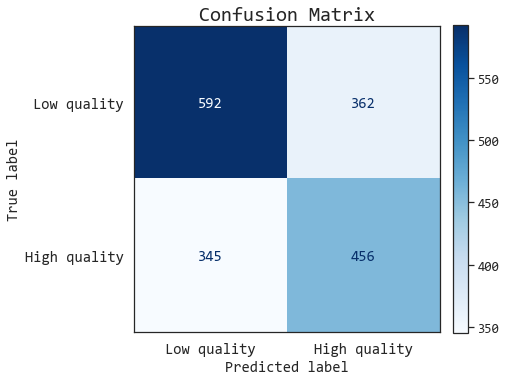

In [67]:
get_confusion_matrix_plot(y_pred, y_test, cmap='Blues', values_format='d', font_size=15, figsize=(6, 6));

## ROC Curve

In [68]:
from ml_editor.model_evaluation import get_roc_plot

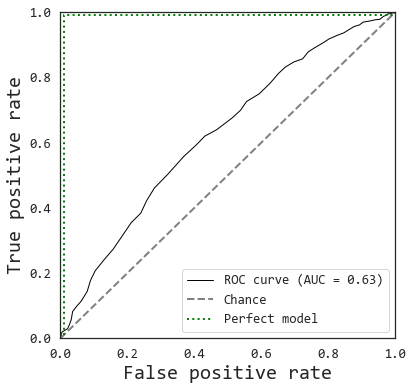

In [70]:
get_roc_plot(y_pred_proba[:, 1], y_test, figsize=(6, 6))

ROC curves can help judge the overall performance of a model, but most models are designed with practical applications in mind. These applications often come with specific performance requirements, such as maintaining false positives below a certain rate. To understand model performance better, it can be helpful to highlight the relevant part of an ROC curve.

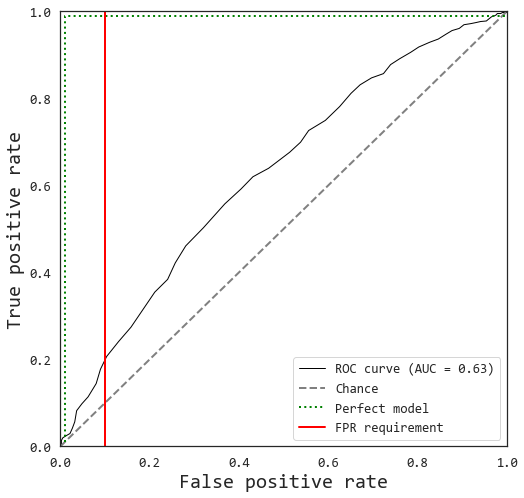

In [71]:
get_roc_plot(y_pred_proba[:, 1], y_test, fpr_bar=.1, figsize=(8, 8))

### Calibration Curve
Finally, we'll plot a calibration curve, which plots the fraction of actual positive examples as a function of a model's probability score. Such a curve allows us to measure the quality of a model's probability estimabe (when a model says a question has a 60% chance to be good, is that actually the case?)